# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업을 말한다. 데이터의 차원은 바꾸되 본질적 정보의 양은 줄이고 싶지 않을 때(loss를 최소화) 사용한다. 모형최종검증을 위한 모델의 과체적화, 교차검증 성능을 좋게 만들기 위해 PCA를 사용한다.

## 차원 축소

차원 축소란(Dimension Reduction) 고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄이는 것을 말한다. 다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 한다.

<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">

## PCA와 고유값 분해

$D$ 차원의 데이터 $x$가 $N$개 있으면 이 데이터는 특징 행렬 $X \in \mathbf{R}^{N\times D}$로 나타낼 수 있다.
이 데이터를 가능한한 쓸모있는 정보를 유지하면서 더 적은  차원인 $M (M < D)$ 차원의 차원축소 벡터 $\hat{x}$으로 변환하고자 한다. 작게 움직이는 변수는 움직이지 않은 거라고 가정해 원래 데이터에서 크게 바뀌지 않은 것이라고 가정한다. 한 변수(분산이 제일 큰 변수, 다른 데이터들의 분산을 작게하는 변수)를 basis vector로 하여 다른 변수를 강제적으로 이 평면에 projection 시킨 것이다.

PCA(Principal Component Analysis) 방법은 선형 변환을 사용한다. 다음과 같이 변환 행렬 $W \in \mathbf{R}^{M \times D}$을 사용하는 선형 변환을 생각하자.

$$
\hat{x}_i = W x_i \;\;\;(x \in \mathbf{R}^D,\; W \in \mathbf{R}^{M \times D},\; \hat{x} \in \mathbf{R}^M)
$$

이를 행렬식으로 바꾸면 다음과 같다.

$$
\hat{X} = XW^{T} \;\;\;(X \in \mathbf{R}^{N \times D},\; \hat{X} \in \mathbf{R}^{N \times M}, W^T \in \mathbf{R}^{D \times M})
$$

PCA의 목표는 변환 결과인 차원축소 벡터 $\hat{x}_i$가 정보가 원래의 벡터 $x_i$가 가졌던 정보와 가장 유사하게 되는 $W$ 값을 찾는 것이다. 

그러나 $\hat{x}_i$는 $M(M < D)$ 차원 벡터로 원래의 $D$ 차원 벡터 $x_i$와 차원이 다르기 때문에 직접 두 벡터를 비교할 수는 없고 $\hat{x}_i$를 도로 $D$ 차원 벡터로 선형 변형하는 최적의 변환 행렬 $U \in \mathbf{R}^{D \times M}$를 찾아야 한다. 

이런 역변환 행렬 $U$가 존재한다고 가정하자. 그러면 원래의 데이터 벡터 $x$를 더 낮은 차원의 데이터 $\hat{x} = Wx $으로 변환했다가 다시 원래의 차원으로 되돌릴 수 있다. 도로 $D$차원으로 변환된 벡터를 $\hat{\hat{x}}$라고 하자.

$$ \hat{\hat{x}} = U \hat{x}  \;\;\;(\hat{x} \in \mathbf{R}^M,\; U \in \mathbf{R}^{D \times M},\; \hat{\hat{x}} \in \mathbf{R}^D) $$

물론 이렇게 변환과 역변환을 통해 원래의 차원으로 되돌린 벡터 $U \hat{x}$은 원래의 벡터 $x$와 비슷할 뿐 정확히 같지는 않다. 다만 이 값을 다시 한번 차원 축소 변환하면 도로 $\hat{x}$가 된다. 즉,

$$ W \hat{\hat{x}} = W U \hat{x} = \hat{x} $$

따라서 $W$와 $U$는 다음 관계가 있다.

$$ WU = I $$

역변환 행렬 $U$을 알고 있다고 가정하고 역변환을 했을 때 원래 벡터 $x$와 가장 비슷해지는 차원축소 벡터 $\hat{x}$를 다음과 같이 최적화를 이용하여 찾는다.

$$
\arg\min_{\hat{x}} || x - U \hat{x} ||^2
$$

목적함수는 다음과 같이 바꿀 수 있다.

$$
\begin{eqnarray}
|| x - U \hat{x} ||^2 
&=& (x - U \hat{x})^T (x - U \hat{x}) \\
&=& x^Tx - \hat{x}^T U^T {x}  - x^T U \hat{x} + \hat{x}^T U^T U \hat{x} \\
&=& x^Tx - 2 x^T U \hat{x} + \hat{x}^T  \hat{x} \\
\end{eqnarray}
$$

이 식을 $\hat{x}$로 미분하면,

$$ - 2 U^Tx + 2\hat{x} = 0$$

$$ \hat{x} = U^Tx $$

가 된다. 원래의 변환식 

$$ \hat{x} = Wx $$

과 비교하면

$$ U = W^{T} $$

임을 알 수 있다. 

이 때 다음 식이 성립한다.

$$ WW^{T} = I $$


이제 남은 문제는 최적의 변환 행렬 $W$을 찾는 것이다. 이 경우의 최적화 문제는 다음과 같이 된다.

$$
\arg\min_{W} \sum_{i=1}^N || x_i - W^{T} W x_i ||^2
$$

모든 데이터에 대해 적용하면 목적함수는 다음처럼 바뀐다.

$$
\arg\min_{W} || X - X W^{T} W ||^2
$$

여기에서 
$$ || A || = || A ||_F = \sqrt{ \sum_i \sum_j a_{ij}^2 } = \sqrt{ tr (A^TA) } $$

가장 단순한 경우로 축소된 차원 $M=1$인 경우를 생각하자. 이 때는 $W=w^T$ 벡터가 된다. $WW^T=I$ 조건은 $w^Tw=1$이 된다.

$$ 
\arg\min_{W} || X - X W^{T} W ||^2_{F} \\
= \arg\min_{W} || X - X ww^T ||^2_{F} \\
= \arg\min_{W} tr (X - X ww^T)^T(X - X ww^T) \\
= \arg\min_{W} tr (X^T - ww^T X^T)(X - X ww^T) \\
= \arg\min_{W} tr (X^TX - X^T X ww^T - ww^T X^T X + ww^T X^T X ww^T) \\
= \arg\min_{W} -2 tr (X^T X ww^T) + tr(ww^T X^T X ww^T) \\
= \arg\min_{W} -2 tr (X^T X ww^T) + tr(X^T X ww^T ww^T) \\
= \arg\min_{W} -2 tr (X^T X ww^T) + tr(X^T X ww^T) \\
= \arg\min_{W} - tr (X^T X ww^T) \\
= \arg\max_{W} tr (X^T X ww^T) \\
= \arg\max_{W} tr (w^T X^T X w) \\
$$

$X^TX$를 고유 분해하여 대각화하면 $V^T\Sigma V$가 된다

$$
\arg\max_{W} tr (w^T X^T X w) \\
= \arg\max_{W} tr ((Vw)^T\Sigma (Vw))
$$

이 값이 가장 커지려면 $w$가 $X^TX$의 가장 큰 고유값에 대응하는 고유 벡터가 되어야 한다. 따라서 이 최적화 문제의 답 $W^{\ast}$은 공분산 행렬 $XX^T$의 고유값 분해를 사용하여 찾을 수 있다. 

축소 차원 $M$이 1보다 커지면 $W^{\ast}$의 각 열은 가장 큰 고유값부터 $\hat{D}$개의 순차적인 고유값에 대응하는 고유 벡터로 이루어진다. 

- PCA는 데이터가 가장 잘 보이는 방향으로 projection시킨 것이다. 특정한 방향에서 보았을 때 데이터가 그룹화 되어있는 것이 보이면 분류가 잘 되는 것이고, 그 차원에서 그룹화 되어있는 것으로 보이지 않으면 새로운 차원(새로운 독립변수)을 찾아서 변수로 넣어주어야 한다.

#### VIF와 PCA의 차이
PCA는 $x$값만 봐서 $x$가 제일 퍼져있는 방향을 찾기 때문에 $y$와의 상관관계가 고려되지 않고, VIF보다 좋다고도 할 수 없다. 하지만 변수를 줄이는 힌트로 PCA를 사용하거나 변수가 무수히(1000개) 많을 때 집약적으로 변수를 줄일 수 있는 방법 중 하나이다.
 - VIF는 $x_2$를 $x_1$으로 regression 하였기 때문에 원래 데이터를 해당변수의 축과 수평으로 이동시켜 회귀선과 만나는 부분으로 이동시킨다.

 - PCA는 두 변수의 축을 회전시켜서 새로운 $x_1$과 $x_2$에 projection 시키기 때문에 원래 데이터에서 회귀선에 수직을 이루는 선을 그었을 때 만나는 점으로 이동시킨다.

### Scikit-Learn 의 PCA 기능

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * n_components : 정수
    * 최종 성분의 수


* 속성:	
 * `components_`
    * 주성분 축
 * `n_components_` 
    * 주성분의 수
 * `mean_` :
    * 각 성분의 평균
 * `explained_variance_ratio_` 
    * 각 성분의 분산 비율


## 2차원 PCA의 예

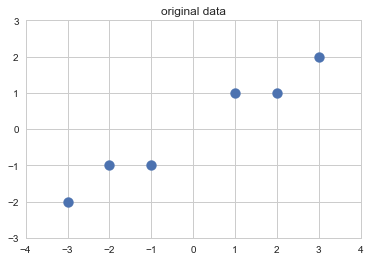

In [2]:
%matplotlib inline
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

차원을 줄이지 않고 PCA를 쓰면 직교하는 좌표계로 변환하기만 한다.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [5]:
w, U = np.linalg.eig(pca.get_covariance())

In [6]:
U.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

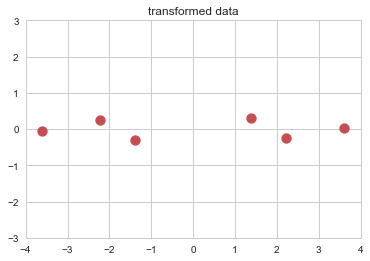

In [7]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

PCA는 이렇게 직교하는 차원에서 분산이 작은 좌표들을 생략하는 것과 같다.

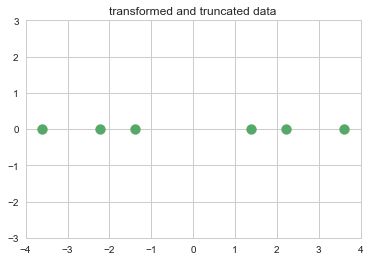

In [8]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

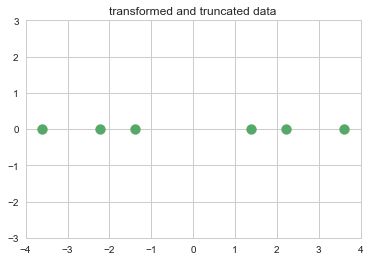

In [9]:
z = PCA(n_components=1).fit_transform(X)

plt.scatter(z, np.zeros_like(z), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## IRIS 데이터의 예

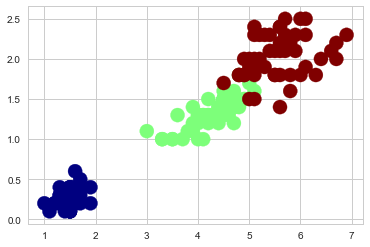

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

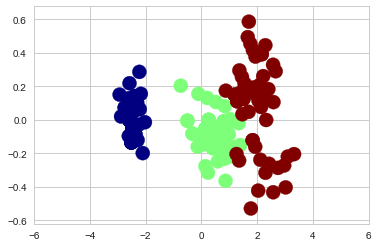

In [11]:
model2 = PCA(2).fit(X)
X2 = model2.transform(X)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

In [12]:
model2.components_

array([[ 0.92154695,  0.38826694],
       [-0.38826694,  0.92154695]])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


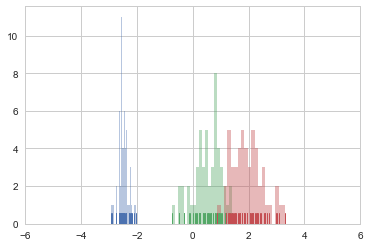

In [13]:
model1 = PCA(1).fit(X)
X1 = model1.transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [14]:
model1.components_

array([[0.92154695, 0.38826694]])

전체 데이터를 변환하면 다음과 같다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


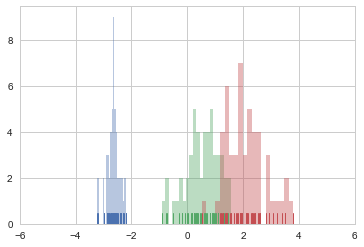

In [15]:
model1 = PCA(1).fit(iris.data)
X1 = model1.transform(iris.data)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

In [16]:
model1.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393]])

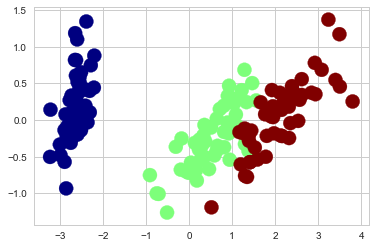

In [17]:
model2 = PCA(2).fit(iris.data)
X2 = model2.fit_transform(iris.data)
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

In [18]:
model2.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

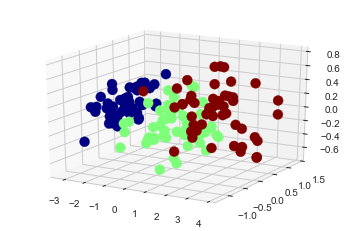

In [19]:
X3 = PCA(3).fit_transform(iris.data)
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1)
    ax.view_init(20, azim)

plot_pca(-60)

In [20]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

## 이미지 PCA

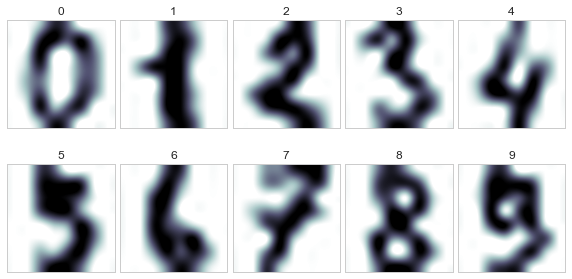

In [21]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone_r, interpolation="spline36")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 3)


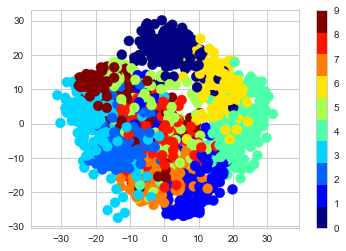

In [23]:
cmap = plt.cm.get_cmap('jet', 10)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=cmap)
plt.axis("equal")
plt.colorbar()
plt.show()

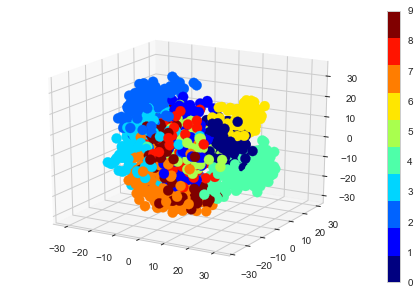

In [24]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111, projection='3d');
    p = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=cmap, alpha=1)
    plt.colorbar(p)
    ax.view_init(20, azim)

plot_pca2(-60)

In [25]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

interactive(children=(IntSlider(value=0, description='azim', max=180, step=10), Output()), _dom_classes=('widget-interact',))

## 성분 수의 결정

성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치한다.
성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략한다.


* 원래의  데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 $$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$


* PCA 변환한   데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 $$ \lambda_1,  \cdots, \lambda_L $$


* Explained Variance 
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$

## 보스톤 집값 예측 문제에 응용

In [26]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(ZN) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [27]:
idx_outlier = \
    np.array([  7,  54, 148, 152, 160, 214, 267, 364, 365, 367, 368, 369, 371,
              372, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410, 412, 413,
              415, 416, 418, 419, 426, 466, 489, 490, 492, 495, 505, 161, 162,
              163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369, 370, 371, 372])
    
idx = list(set(range(len(dfX))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

In [28]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     223.9
Date:                Mon, 09 Jul 2018   Prob (F-statistic):          1.49e-185
Time:                        14:22:17   Log-Likelihood:                 302.66
No. Observations:                 458   AIC:                            -577.3
Df Residuals:                     444   BIC:                            -519.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [29]:
dfX2 = sm.add_constant(pd.DataFrame(PCA(n_components=8).fit_transform(dfX)))
model_boston2 = sm.OLS(np.log(dfy), dfX2)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     287.0
Date:                Mon, 09 Jul 2018   Prob (F-statistic):          3.47e-171
Time:                        14:22:19   Log-Likelihood:                 254.16
No. Observations:                 458   AIC:                            -490.3
Df Residuals:                     449   BIC:                            -453.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0391      0.007    463.560      0.0